#### DEPENDENCIAS DEL PIPELINE





In [1]:


import sys
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the project directory path as the laboratory_2 folder
project_dir = '/content/drive/MyDrive/clasificacion_2_niveles/laboratory_2'

# Add the *parent* directory of laboratory_2 to sys.path
# This might still be necessary if other parts of your project rely on imports
# from the higher level directory.
parent_project_dir = '/content/drive/MyDrive/clasificacion_2_niveles'
if parent_project_dir not in sys.path:
    sys.path.append(parent_project_dir)
    print(f"Added {parent_project_dir} to sys.path")


# Change the current directory to the new project directory
# This is crucial for relative file paths within your laboratory_2 folder
if os.path.exists(project_dir):
    os.chdir(project_dir)
    print(f"Changed current directory to: {os.getcwd()}")
else:
    print(f"Project directory not found at: {project_dir}. Cannot change directory.")


# Add the project directory (laboratory_2) to sys.path
# This allows importing modules directly from within laboratory_2
if project_dir not in sys.path:
    sys.path.append(project_dir)
    print(f"Added {project_dir} to sys.path")


# Optional: Verify the updated sys.path and current working directory
print("\nUpdated sys.path:")
for p in sys.path:
    print(p)

print("\nCurrent working directory:")
print(os.getcwd())

Mounted at /content/drive
Added /content/drive/MyDrive/clasificacion_2_niveles to sys.path
Changed current directory to: /content/drive/MyDrive/clasificacion_2_niveles/laboratory_2
Added /content/drive/MyDrive/clasificacion_2_niveles/laboratory_2 to sys.path

Updated sys.path:
/content
/env/python
/usr/lib/python311.zip
/usr/lib/python3.11
/usr/lib/python3.11/lib-dynload

/usr/local/lib/python3.11/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.11/dist-packages/IPython/extensions
/root/.ipython
/content/drive/MyDrive/clasificacion_2_niveles
/content/drive/MyDrive/clasificacion_2_niveles/laboratory_2

Current working directory:
/content/drive/MyDrive/clasificacion_2_niveles/laboratory_2


#### Instancias del MODELO AFINADO


In [2]:

import pandas as pd
import numpy as np

from tools_2 import get_data



In [3]:
from tools_2 import get_data, load_dictionaries, preprocess_data, DataProcessor, generate_hierarchy_map, ArticulosDataset, HierarchicalBertClassifierWithConstraint


In [4]:
from tools_2 import get_data, load_dictionaries, preprocess_inference_data, DataProcessor, generate_hierarchy_map, ArticulosDataset, HierarchicalBertClassifierWithConstraint, build_import_data, FiltroAjuste


In [5]:
ruta = './datos/train_data_v1.csv'
df_train = get_data(ruta)

ruta1 = './datos/dicaranceles.xlsx'
dic_aranceles = get_data(ruta1)

ruta2 = './datos/data_retrain_v1.csv'
df_retrain = get_data(ruta2)




# PROCESS *df_train*

In [6]:
# 2 STEP: LOAD DICTIONARIES PENDING TO CREATE TABLES

stopwords_load_path = './diccionarios/stopwords_spanish.json'
replacement_dict_load_path = './diccionarios/replacement_dict.json'

stopwords_spanish, replacement_dict = load_dictionaries(stopwords_load_path, replacement_dict_load_path)


# 3 STEP: Preprocess the data

#df_train = preprocess_data(df_train, stopwords_spanish, replacement_dict)


# PROCESS *df_retrain*

In [7]:
target_columns = ['Detalle Artículo', 'SAC 8 DIG' , 'Categoria', 'Familia',  'Descripción de Mercadería']
df_retrain = df_retrain[target_columns]

column_rename_map = {
    'Categoria': 'nombre_categoria',
    'Familia': 'familia',
    'Detalle Artículo': 'linea',
    'Descripción de Mercadería': 'descripcion',
    'SAC 8 DIG': 'cod_arancelario'
}

df_retrain = df_retrain.rename(columns=column_rename_map)

# 2 STEP: LOAD DICTIONARIES PENDING TO CREATE TABLES

stopwords_load_path = './diccionarios/stopwords_spanish.json'
replacement_dict_load_path = './diccionarios/replacement_dict.json'

stopwords_spanish, replacement_dict = load_dictionaries(stopwords_load_path, replacement_dict_load_path)

# 3 STEP: Preprocess the new data


df_retrain = build_import_data(
    resource_df=df_retrain,
    desc_col='descripcion',
    code_col='cod_arancelario',
    dict_df=dic_aranceles
)

stopwords_spanish, replacement_dict = load_dictionaries(stopwords_load_path, replacement_dict_load_path)

data_retrain = preprocess_inference_data(df_retrain, stopwords_spanish, replacement_dict)

In [8]:
df_train

,index_producto,descripcion,descripcion_2,proveedor,importador,pais,cod_arancelario,producto_referencia,corpus,codigo_categoria,nombre_categoria,familia,linea,subfamilia
0,1,"CINTA TRANSPARENTE 2""X30M","PAPEL, CARTON, GUATA DE CELULOSA Y NAPA DE FIB...",TESA TAPE CENTRO AMERICA S.A. 0045,NaN,NaN,481141120010,533800000900,"CINTA TRANSPARENTE 2""X30M PAPEL, CARTON, GUATA...",2,PINTURAS,CINTAS,0219 - CINTAS EMPAQUE,CINTAS DE EMBALAJE
1,2,"CINTA EMPAQUE TRANSPARENTE 2""X90M","PAPEL, CARTON, GUATA DE CELULOSA Y NAPA DE FIB...",TESA TAPE CENTRO AMERICA S.A. 0045,NaN,NaN,481141120010,533800900007,"CINTA EMPAQUE TRANSPARENTE 2""X90M PAPEL, CARTO...",2,PINTURAS,CINTAS,0219 - CINTAS EMPAQUE,CINTAS DE EMBALAJE
2,3,"CINTA EMPAQUE CAFE 2""X90M","PAPEL, CARTON, GUATA DE CELULOSA Y NAPA DE FIB...",TESA TAPE CENTRO AMERICA S.A. 0045,NaN,NaN,481141120010,533800900008,"CINTA EMPAQUE CAFE 2""X90M PAPEL, CARTON, GUATA...",2,PINTURAS,CINTAS,0219 - CINTAS EMPAQUE,CINTAS DE EMBALAJE
3,4,"CINTA EMPAQUE TRANSPARENTE 2""X90M 6P","PAPEL, CARTON, GUATA DE CELULOSA Y NAPA DE FIB...",TESA TAPE CENTRO AMERICA S.A. 0045,NaN,NaN,481141120010,533800900011,"CINTA EMPAQUE TRANSPARENTE 2""X90M 6P PAPEL, CA...",2,PINTURAS,CINTAS,0219 - CINTAS EMPAQUE,CINTAS DE EMBALAJE
4,5,"CINTA EMPAQUE CAFE 2""X90M 6PACK","PAPEL, CARTON, GUATA DE CELULOSA Y NAPA DE FIB...",TESA TAPE CENTRO AMERICA S.A. 0045,NaN,NaN,481141120010,533800900012,"CINTA EMPAQUE CAFE 2""X90M 6PACK PAPEL, CARTON,...",2,PINTURAS,CINTAS,0219 - CINTAS EMPAQUE,CINTAS DE EMBALAJE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9418,9419,PATA- REDONDAS- MUEBLES,LOS DEMAS MUEBLES Y SUS PARTES,GLOBALOR LTD-HERRAJES DE COCINA 0357,NaN,NaN,940350000000,HPA697-15-N,PATA- REDONDAS- MUEBLES LOS DEMAS MUEBLES Y SU...,32,Ferreteria,ACCESORIOS PARA MUEBLES,1832 - ACCESORIOS PARA MUEBLES,ACCESORIOS PARA MUEBLES
9419,9420,PATA- REDONDAS- MUEBLES,LOS DEMAS MUEBLES Y SUS PARTES,GLOBALOR LTD-HERRAJES DE COCINA 0357,NaN,NaN,940350000000,HPA697-10-N,PATA- REDONDAS- MUEBLES LOS DEMAS MUEBLES Y SU...,32,Ferreteria,ACCESORIOS PARA MUEBLES,1832 - ACCESORIOS PARA MUEBLES,ACCESORIOS PARA MUEBLES
9420,9421,PATA- MUBLES,LOS DEMAS MUEBLES Y SUS PARTES,GLOBALOR LTD-HERRAJES DE COCINA 0357,NaN,NaN,940350000000,HPA596-10,PATA- MUBLES LOS DEMAS MUEBLES Y SUS PARTES,32,Ferreteria,ACCESORIOS PARA MUEBLES,1832 - ACCESORIOS PARA MUEBLES,ACCESORIOS PARA MUEBLES
9421,9422,PATA- MUBLES,LOS DEMAS MUEBLES Y SUS PARTES,GLOBALOR LTD-HERRAJES DE COCINA 0357,NaN,NaN,940350000000,HPA594-10,PATA- MUBLES LOS DEMAS MUEBLES Y SUS PARTES,32,Ferreteria,ACCESORIOS PARA MUEBLES,1832 - ACCESORIOS PARA MUEBLES,ACCESORIOS PARA MUEBLES


# DATASETS COMPARATIVOS DE CLASES

In [16]:
cols_retrain = ['descripcion','cod_arancelario','nombre_categoria','familia']
cols_train = ['descripcion','cod_arancelario','nombre_categoria','familia']

In [17]:
df_train = df_train[cols_train]
df_retrain = df_retrain[cols_retrain]

In [18]:
print(df_train.head(3))
print(df_train.shape)


                         descripcion  cod_arancelario nombre_categoria familia
0          CINTA TRANSPARENTE 2"X30M     481141120010         PINTURAS  CINTAS
1  CINTA EMPAQUE TRANSPARENTE 2"X90M     481141120010         PINTURAS  CINTAS
2          CINTA EMPAQUE CAFE 2"X90M     481141120010         PINTURAS  CINTAS
(9423, 4)


In [19]:
print(df_retrain.head(3))
print(df_retrain.shape)

                                         descripcion cod_arancelario  \
0            SHAMPOO PARA CARRO 64OZ. MARCA ARMORALL        34053000   
1  PROTECTOR ARMORALL PARA CARROCERIA GEL OUTLAST...        34053000   
2                         LUBRICANTE WD40 Q-20-01609        34039900   

  nombre_categoria                 familia  
0       AUTOMOTRIZ  ACCESORIOS DE LIMPIEZA  
1       AUTOMOTRIZ  ACCESORIOS DE LIMPIEZA  
2       AUTOMOTRIZ  LUBRICANTES Y ADITIVOS  
(47250, 4)


# **EXPLORACION**


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Dependencias cargadas correctamente")
print("📊 Configuración de visualización establecida")

✅ Dependencias cargadas correctamente
📊 Configuración de visualización establecida


In [21]:
df_train['nombre_categoria'] = df_train['nombre_categoria'].str.upper()
df_train['familia'] = df_train['familia'].str.upper()

df_retrain['nombre_categoria'] = df_retrain['nombre_categoria'].str.upper()
df_retrain['familia'] = df_retrain['familia'].str.upper()

In [22]:
# Agregar identificador de origen
df_train_labeled = df_train.copy()
df_retrain_labeled = df_retrain.copy()
df_train_labeled['dataset'] = 'EPA'
df_retrain_labeled['dataset'] = 'NOVEX'


In [23]:
df_retrain_labeled

,descripcion,cod_arancelario,nombre_categoria,familia,dataset
0,SHAMPOO PARA CARRO 64OZ. MARCA ARMORALL,34053000,AUTOMOTRIZ,ACCESORIOS DE LIMPIEZA,NOVEX
1,PROTECTOR ARMORALL PARA CARROCERIA GEL OUTLAST...,34053000,AUTOMOTRIZ,ACCESORIOS DE LIMPIEZA,NOVEX
2,LUBRICANTE WD40 Q-20-01609,34039900,AUTOMOTRIZ,LUBRICANTES Y ADITIVOS,NOVEX
3,LUBRICANTE WD40 EN SPRAY Q-20-01550,34039900,AUTOMOTRIZ,LUBRICANTES Y ADITIVOS,NOVEX
4,FOCO PARA CARRO 12V T10X36 CLARO C5W,85392900,AUTOMOTRIZ,REPUESTOS,NOVEX
...,...,...,...,...,...
47245,TRAMPA PARA INSECTOS,39199000,VIVERO,CONTROL DE PLAGAS,NOVEX
47246,TRAMPA PARA RATA MADERA 31560T,73262010,VIVERO,CONTROL DE PLAGAS,NOVEX
47247,TRAMPA PARA RATA METALICA 31571T,73262010,VIVERO,CONTROL DE PLAGAS,NOVEX
47248,VELAS DE CITRONELA,38089110,VIVERO,CONTROL DE PLAGAS,NOVEX


In [24]:
# Dataset combinado para análisis comparativo
df_combined = pd.concat([df_train_labeled, df_retrain_labeled], ignore_index=True)
print(f"📊 Dataset combinado creado: {len(df_combined)} registros totales")


📊 Dataset combinado creado: 56673 registros totales


In [25]:
# CELDA 3: ESTADÍSTICAS BÁSICAS GENERALES
# =============================================================================
print("="*70)
print("📊 ESTADÍSTICAS BÁSICAS DE LOS DATASETS")
print("="*70)

# Crear tabla de estadísticas básicas
basic_stats = {
    'Métrica': ['Tamaño del Dataset', 'Categorías únicas', 'Familias únicas', 'Códigos arancelarios únicos'],
    'EPA (Training)': [
        f"{len(df_train):,}",
        f"{df_train['nombre_categoria'].nunique():,}",
        f"{df_train['familia'].nunique():,}",
        f"{df_train['cod_arancelario'].nunique():,}"
    ],
    'NOVEX (Retraining)': [
        f"{len(df_retrain):,}",
        f"{df_retrain['nombre_categoria'].nunique():,}",
        f"{df_retrain['familia'].nunique():,}",
        f"{df_retrain['cod_arancelario'].nunique():,}"
    ]
}

df_basic_stats = pd.DataFrame(basic_stats)
print(df_basic_stats.to_string(index=False))

# Calcular ratios importantes
size_ratio = len(df_retrain) / len(df_train)
category_ratio = df_retrain['nombre_categoria'].nunique() / df_train['nombre_categoria'].nunique()

print(f"\n📈 RATIOS CLAVE:")
print(f"   • NOVEX es {size_ratio:.1f}x más grande que EPA")
print(f"   • NOVEX tiene {category_ratio:.1f}x más categorías que EPA")


📊 ESTADÍSTICAS BÁSICAS DE LOS DATASETS
                    Métrica EPA (Training) NOVEX (Retraining)
         Tamaño del Dataset          9,423             47,250
          Categorías únicas             26                 24
            Familias únicas            350                327
Códigos arancelarios únicos            544                612

📈 RATIOS CLAVE:
   • NOVEX es 5.0x más grande que EPA
   • NOVEX tiene 0.9x más categorías que EPA


In [26]:
df_retrain['nombre_categoria'].unique()

array(['AUTOMOTRIZ', 'FERRETERIA', 'BAÑOS', 'DECORACIÓN', 'CERRAJERIA',
       'COCINAS', 'ORGANIZACIÓN', 'EXTERIORES', 'HERRAMIENTAS MANUALES',
       'CONSTRUCCIÓN', 'ELECTRICIDAD', 'ELECTRODOMÉSTICOS', 'ILUMINACIÓN',
       'LIMPIEZA', 'MADERAS', 'MAQUINARIA', 'MATERIALES ELÉCTRICOS',
       'MUEBLES', 'PINTURA', 'PISOS', 'PLOMERIA', 'PUERTAS Y VENTANAS',
       'SEGURIDAD', 'VIVERO'], dtype=object)

In [27]:
df_train['nombre_categoria'].unique()

array(['PINTURAS', 'ELECTRICIDAD', 'DECORACIÓN', 'EXTERIORES', 'MUEBLES',
       'PLOMERIA', 'LIMPIEZA', 'VIVERO', 'AUTOMOTRIZ', 'CENTRO MUEBLERO',
       'COCINAS', 'ORGANIZACIÓN', 'HERRAMIENTAS MANUALES', 'MAQUINARIA',
       'SEGURIDAD', 'ILUMINACIÓN', 'FERRETERIA', 'CERRAJERÍA', 'MADERAS',
       'PUERTA Y VENTANAS', 'PISOS', 'ELECTRODOMÉSTICOSS', 'BAÑOS',
       'MATERIALES ELÉCTRICOS', 'CONSTRUCCIÓN', 'IMPULSO'], dtype=object)

In [28]:
# CELDA 4: ANÁLISIS DE SOLAPAMIENTO DE CATEGORÍAS
# =============================================================================
print("\n" + "="*70)
print("🏷️  ANÁLISIS DE SOLAPAMIENTO DE CATEGORÍAS")
print("="*70)

# Obtener conjuntos de categorías
epa_categories = set(df_train['nombre_categoria'].dropna().unique())
novex_categories = set(df_retrain['nombre_categoria'].dropna().unique())

# Calcular intersecciones
common_categories = epa_categories.intersection(novex_categories)
only_epa = epa_categories - novex_categories
only_novex = novex_categories - epa_categories

# Métricas de solapamiento
overlap_pct_epa = len(common_categories) / len(epa_categories) * 100
overlap_pct_novex = len(common_categories) / len(novex_categories) * 100

print(f"📋 Categorías en EPA: {len(epa_categories):,}")
print(f"📋 Categorías en NOVEX: {len(novex_categories):,}")
print(f"🤝 Categorías comunes: {len(common_categories):,}")
print(f"🔒 Solo en EPA: {len(only_epa):,} ({len(only_epa)/len(epa_categories)*100:.1f}%)")
print(f"🆕 Solo en NOVEX: {len(only_novex):,} ({len(only_novex)/len(novex_categories)*100:.1f}%)")

print(f"\n📊 MÉTRICAS DE SOLAPAMIENTO:")
print(f"   • {overlap_pct_epa:.1f}% de categorías EPA están en NOVEX")
print(f"   • {overlap_pct_novex:.1f}% de categorías NOVEX están en EPA")

# Guardar resultados para análisis posterior
category_analysis_results = {
    'common': common_categories,
    'only_epa': only_epa,
    'only_novex': only_novex,
    'overlap_pct_epa': overlap_pct_epa
}


🏷️  ANÁLISIS DE SOLAPAMIENTO DE CATEGORÍAS
📋 Categorías en EPA: 26
📋 Categorías en NOVEX: 24
🤝 Categorías comunes: 20
🔒 Solo en EPA: 6 (23.1%)
🆕 Solo en NOVEX: 4 (16.7%)

📊 MÉTRICAS DE SOLAPAMIENTO:
   • 76.9% de categorías EPA están en NOVEX
   • 83.3% de categorías NOVEX están en EPA


In [29]:
# CELDA 5: ANÁLISIS DE SOLAPAMIENTO DE FAMILIAS
# =============================================================================
print("\n" + "="*70)
print("👥 ANÁLISIS DE SOLAPAMIENTO DE FAMILIAS")
print("="*70)

# Obtener conjuntos de familias (excluyendo nulos)
epa_families = set(df_train['familia'].dropna().unique())
novex_families = set(df_retrain['familia'].dropna().unique())

# Calcular intersecciones
common_families = epa_families.intersection(novex_families)
only_epa_fam = epa_families - novex_families
only_novex_fam = novex_families - epa_families

print(f"👨‍👩‍👧‍👦 Familias en EPA: {len(epa_families):,}")
print(f"👨‍👩‍👧‍👦 Familias en NOVEX: {len(novex_families):,}")
print(f"🤝 Familias comunes: {len(common_families):,}")
print(f"🔒 Solo en EPA: {len(only_epa_fam):,} ({len(only_epa_fam)/len(epa_families)*100:.1f}%)")
print(f"🆕 Solo en NOVEX: {len(only_novex_fam):,} ({len(only_novex_fam)/len(novex_families)*100:.1f}%)")



👥 ANÁLISIS DE SOLAPAMIENTO DE FAMILIAS
👨‍👩‍👧‍👦 Familias en EPA: 350
👨‍👩‍👧‍👦 Familias en NOVEX: 327
🤝 Familias comunes: 155
🔒 Solo en EPA: 195 (55.7%)
🆕 Solo en NOVEX: 172 (52.6%)


In [30]:
# CELDA 6: TOP CATEGORÍAS POR DATASET
# =============================================================================
print("\n" + "="*70)
print("🏆 TOP 15 CATEGORÍAS POR DATASET")
print("="*70)

# Top categorías EPA
print(f"\n🥇 TOP 15 CATEGORÍAS EN EPA:")
print("-" * 50)
epa_top_cats = df_train['nombre_categoria'].value_counts().head(15)
for i, (cat, count) in enumerate(epa_top_cats.items(), 1):
    pct = count/len(df_train)*100
    print(f"{i:2d}. {cat[:45]:<45} | {count:>6,} ({pct:>5.1f}%)")

print(f"\n🥈 TOP 15 CATEGORÍAS EN NOVEX:")
print("-" * 50)
novex_top_cats = df_retrain['nombre_categoria'].value_counts().head(15)
for i, (cat, count) in enumerate(novex_top_cats.items(), 1):
    pct = count/len(df_retrain)*100
    print(f"{i:2d}. {cat[:45]:<45} | {count:>6,} ({pct:>5.1f}%)")


🏆 TOP 15 CATEGORÍAS POR DATASET

🥇 TOP 15 CATEGORÍAS EN EPA:
--------------------------------------------------
 1. PLOMERIA                                      |  1,133 ( 12.0%)
 2. HERRAMIENTAS MANUALES                         |    784 (  8.3%)
 3. MAQUINARIA                                    |    751 (  8.0%)
 4. CERRAJERÍA                                    |    718 (  7.6%)
 5. DECORACIÓN                                    |    638 (  6.8%)
 6. ILUMINACIÓN                                   |    588 (  6.2%)
 7. FERRETERIA                                    |    562 (  6.0%)
 8. ELECTRICIDAD                                  |    558 (  5.9%)
 9. BAÑOS                                         |    511 (  5.4%)
10. EXTERIORES                                    |    439 (  4.7%)
11. MUEBLES                                       |    342 (  3.6%)
12. VIVERO                                        |    311 (  3.3%)
13. SEGURIDAD                                     |    293 (  3.1%)
14.

In [31]:
# CELDA 7: ANÁLISIS DE DISTRIBUCIÓN Y DESBALANCE
# =============================================================================
print("\n" + "="*70)
print("⚖️  ANÁLISIS DE DESBALANCE DE CLASES")
print("="*70)

def calculate_gini_coefficient(counts):
    """Calcula el coeficiente de Gini para medir desbalance de clases"""
    counts = np.sort(counts)
    n = len(counts)
    index = np.arange(1, n + 1)
    return (2 * np.sum(index * counts)) / (n * np.sum(counts)) - (n + 1) / n

# Calcular métricas de desbalance
epa_counts = df_train['nombre_categoria'].value_counts().values
novex_counts = df_retrain['nombre_categoria'].value_counts().values

epa_gini = calculate_gini_coefficient(epa_counts)
novex_gini = calculate_gini_coefficient(novex_counts)

print(f"📊 COEFICIENTES DE GINI (0=balanceado, 1=muy desbalanceado):")
print(f"   • EPA: {epa_gini:.3f}")
print(f"   • NOVEX: {novex_gini:.3f}")

# Análisis de categorías raras (pocas muestras)
epa_rare = (df_train['nombre_categoria'].value_counts() < 5).sum()
novex_rare = (df_retrain['nombre_categoria'].value_counts() < 5).sum()

print(f"\n🔍 CATEGORÍAS RARAS (<5 ejemplos):")
print(f"   • EPA: {epa_rare} categorías ({epa_rare/len(epa_categories)*100:.1f}%)")
print(f"   • NOVEX: {novex_rare} categorías ({novex_rare/len(novex_categories)*100:.1f}%)")



⚖️  ANÁLISIS DE DESBALANCE DE CLASES
📊 COEFICIENTES DE GINI (0=balanceado, 1=muy desbalanceado):
   • EPA: 0.421
   • NOVEX: 0.475

🔍 CATEGORÍAS RARAS (<5 ejemplos):
   • EPA: 1 categorías (3.8%)
   • NOVEX: 0 categorías (0.0%)


In [32]:
# CELDA 8: COMPARACIÓN EN CATEGORÍAS COMUNES
# =============================================================================
print("\n" + "="*70)
print("🔄 DISTRIBUCIÓN EN CATEGORÍAS COMUNES")
print("="*70)

# Analizar distribución en categorías que aparecen en ambos datasets
common_comparison = []

print(f"📊 Top 20 categorías comunes por volumen total:")
print("-" * 80)
print(f"{'Categoría':<35} | {'EPA':<8} | {'NOVEX':<8} | {'Total':<8} | {'Ratio':<6}")
print("-" * 80)

for cat in sorted(common_categories):
    epa_count = (df_train['nombre_categoria'] == cat).sum()
    novex_count = (df_retrain['nombre_categoria'] == cat).sum()
    total_count = epa_count + novex_count
    ratio = novex_count / epa_count if epa_count > 0 else float('inf')

    common_comparison.append({
        'categoria': cat,
        'epa_count': epa_count,
        'novex_count': novex_count,
        'total_count': total_count,
        'ratio': ratio
    })

# Ordenar por volumen total y mostrar top 20
common_df = pd.DataFrame(common_comparison)
common_df_sorted = common_df.sort_values('total_count', ascending=False).head(20)

for _, row in common_df_sorted.iterrows():
    cat_short = row['categoria'][:34] if len(row['categoria']) > 34 else row['categoria']
    print(f"{cat_short:<35} | {row['epa_count']:>6,} | {row['novex_count']:>6,} | {row['total_count']:>6,} | {row['ratio']:>5.1f}")



🔄 DISTRIBUCIÓN EN CATEGORÍAS COMUNES
📊 Top 20 categorías comunes por volumen total:
--------------------------------------------------------------------------------
Categoría                           | EPA      | NOVEX    | Total    | Ratio 
--------------------------------------------------------------------------------
HERRAMIENTAS MANUALES               |    784 |  6,480 |  7,264 |   8.3
COCINAS                             |    256 |  5,716 |  5,972 |  22.3
FERRETERIA                          |    562 |  4,984 |  5,546 |   8.9
DECORACIÓN                          |    638 |  4,595 |  5,233 |   7.2
MAQUINARIA                          |    751 |  3,415 |  4,166 |   4.5
BAÑOS                               |    511 |  2,654 |  3,165 |   5.2
VIVERO                              |    311 |  2,437 |  2,748 |   7.8
ILUMINACIÓN                         |    588 |  2,027 |  2,615 |   3.4
EXTERIORES                          |    439 |  2,065 |  2,504 |   4.7
PLOMERIA                            

In [33]:
# CELDA 9: VERIFICACIÓN DE CALIDAD DE DATOS
# =============================================================================
print("\n" + "="*70)
print("🔍 VERIFICACIÓN DE CALIDAD DE DATOS")
print("="*70)

def analyze_data_quality(df, dataset_name):
    print(f"\n📋 {dataset_name.upper()}:")
    print(f"   • Valores nulos en descripción: {df['descripcion'].isnull().sum():,}")
    print(f"   • Valores nulos en categoría: {df['nombre_categoria'].isnull().sum():,}")
    print(f"   • Valores nulos en familia: {df['familia'].isnull().sum():,}")
    print(f"   • Valores nulos en código arancelario: {df['cod_arancelario'].isnull().sum():,}")

    # Análisis de longitud de descripciones
    desc_lengths = df['descripcion'].dropna().str.len()
    print(f"   • Longitud promedio descripción: {desc_lengths.mean():.1f} caracteres")
    print(f"   • Longitud mínima: {desc_lengths.min()}")
    print(f"   • Longitud máxima: {desc_lengths.max()}")

    # Descripciones muy cortas o muy largas
    too_short = (desc_lengths < 10).sum()
    too_long = (desc_lengths > 200).sum()
    print(f"   • Descripciones muy cortas (<10 chars): {too_short}")
    print(f"   • Descripciones muy largas (>200 chars): {too_long}")

analyze_data_quality(df_train, "EPA")
analyze_data_quality(df_retrain, "NOVEX")


🔍 VERIFICACIÓN DE CALIDAD DE DATOS

📋 EPA:
   • Valores nulos en descripción: 0
   • Valores nulos en categoría: 0
   • Valores nulos en familia: 0
   • Valores nulos en código arancelario: 0
   • Longitud promedio descripción: 37.4 caracteres
   • Longitud mínima: 7
   • Longitud máxima: 60
   • Descripciones muy cortas (<10 chars): 11
   • Descripciones muy largas (>200 chars): 0

📋 NOVEX:
   • Valores nulos en descripción: 0
   • Valores nulos en categoría: 0
   • Valores nulos en familia: 0
   • Valores nulos en código arancelario: 0
   • Longitud promedio descripción: 29.7 caracteres
   • Longitud mínima: 5
   • Longitud máxima: 100
   • Descripciones muy cortas (<10 chars): 425
   • Descripciones muy largas (>200 chars): 0



📊 GENERANDO VISUALIZACIONES COMPARATIVAS


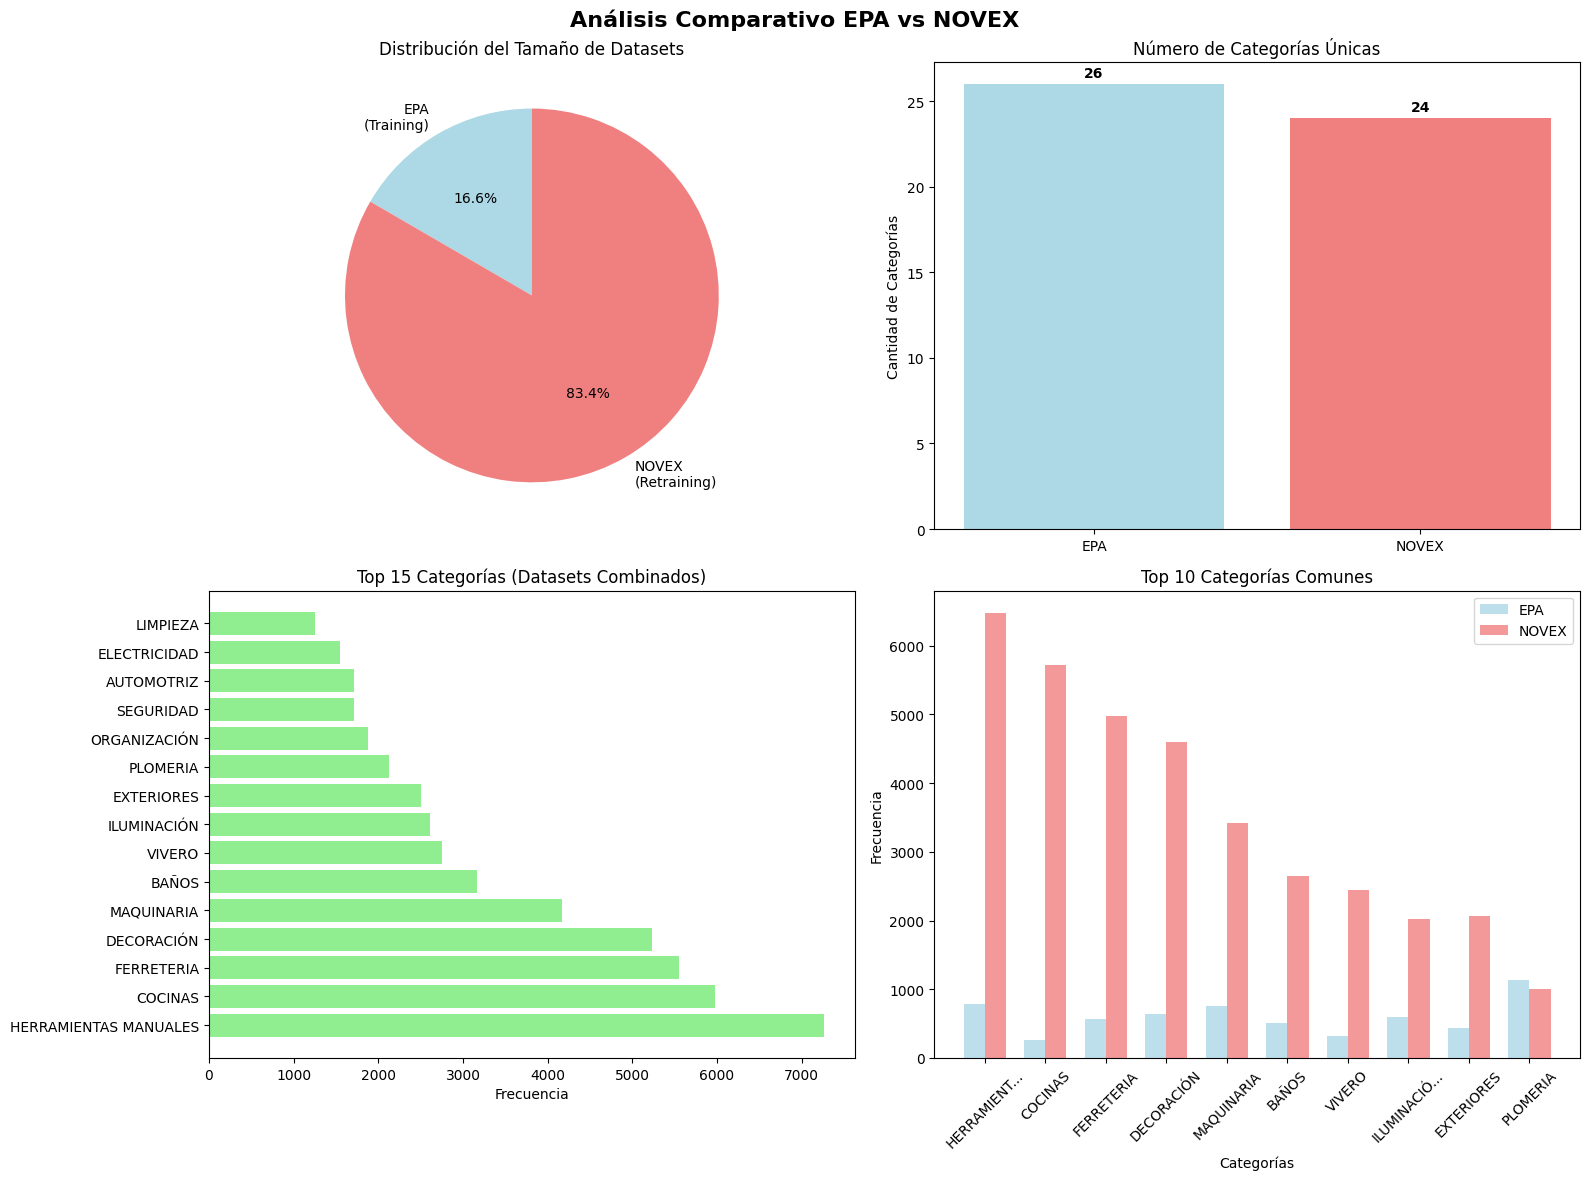

✅ Visualizaciones generadas correctamente


In [34]:
# CELDA 10: VISUALIZACIONES COMPARATIVAS
# =============================================================================
print("\n" + "="*70)
print("📊 GENERANDO VISUALIZACIONES COMPARATIVAS")
print("="*70)

# Crear subplot con múltiples visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis Comparativo EPA vs NOVEX', fontsize=16, fontweight='bold')

# 1. Distribución de tamaños de dataset
sizes = [len(df_train), len(df_retrain)]
labels = ['EPA\n(Training)', 'NOVEX\n(Retraining)']
colors = ['lightblue', 'lightcoral']
axes[0,0].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0,0].set_title('Distribución del Tamaño de Datasets')

# 2. Comparación de número de categorías
datasets = ['EPA', 'NOVEX']
cat_counts = [df_train['nombre_categoria'].nunique(), df_retrain['nombre_categoria'].nunique()]
axes[0,1].bar(datasets, cat_counts, color=colors)
axes[0,1].set_title('Número de Categorías Únicas')
axes[0,1].set_ylabel('Cantidad de Categorías')
for i, v in enumerate(cat_counts):
    axes[0,1].text(i, v + max(cat_counts)*0.01, str(v), ha='center', va='bottom', fontweight='bold')

# 3. Top 15 categorías en dataset combinado
top_combined = df_combined['nombre_categoria'].value_counts().head(15)
y_pos = np.arange(len(top_combined))
axes[1,0].barh(y_pos, top_combined.values, color='lightgreen')
axes[1,0].set_yticks(y_pos)
axes[1,0].set_yticklabels([cat[:30] + '...' if len(cat) > 30 else cat for cat in top_combined.index])
axes[1,0].set_title('Top 15 Categorías (Datasets Combinados)')
axes[1,0].set_xlabel('Frecuencia')

# 4. Distribución en categorías comunes (top 10)
if len(common_df_sorted) >= 10:
    top_10_common = common_df_sorted.head(10)
    x = np.arange(len(top_10_common))
    width = 0.35

    axes[1,1].bar(x - width/2, top_10_common['epa_count'], width,
                  label='EPA', color='lightblue', alpha=0.8)
    axes[1,1].bar(x + width/2, top_10_common['novex_count'], width,
                  label='NOVEX', color='lightcoral', alpha=0.8)

    axes[1,1].set_title('Top 10 Categorías Comunes')
    axes[1,1].set_xlabel('Categorías')
    axes[1,1].set_ylabel('Frecuencia')
    axes[1,1].set_xticks(x)
    axes[1,1].set_xticklabels([cat[:10] + '...' if len(cat) > 10 else cat
                               for cat in top_10_common['categoria']], rotation=45)
    axes[1,1].legend()

plt.tight_layout()
plt.show()

print("✅ Visualizaciones generadas correctamente")

In [35]:
# =============================================================================
# LAB: DETECCIÓN DE MISMATCHES ENTRE EPA Y NOVEX CON OPENAI EMBEDDINGS
# Identificar discrepancias de clasificación usando similitud semántica
# =============================================================================


In [36]:
import openai
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
import warnings
warnings.filterwarnings('ignore')

In [37]:
OPENAI_API_KEY = "sk-proj-3P2..."  # ⚠️ CAMBIAR
openai.api_key = OPENAI_API_KEY

print("✅ OpenAI configurado")
print("📊 Dependencias cargadas para análisis de mismatches")

✅ OpenAI configurado
📊 Dependencias cargadas para análisis de mismatches


In [38]:
# CELDA 1: LIMPIEZA BÁSICA Y UNIFICACIÓN
# =============================================================================
print("🧹 Realizando limpieza básica y unificación...")

# Eliminar duplicados basados en la descripción
initial_train_size = len(df_train)
initial_retrain_size = len(df_retrain)

df_train.drop_duplicates(subset=['descripcion'], inplace=True)
df_retrain.drop_duplicates(subset=['descripcion'], inplace=True)

print(f"✅ Duplicados eliminados en df_train. Nuevo tamaño: {len(df_train):,}")
print(f"✅ Duplicados eliminados en df_retrain. Nuevo tamaño: {len(df_retrain):,}")

🧹 Realizando limpieza básica y unificación...
✅ Duplicados eliminados en df_train. Nuevo tamaño: 8,121
✅ Duplicados eliminados en df_retrain. Nuevo tamaño: 12,348


In [39]:
df_retrain['nombre_categoria'] = df_retrain['nombre_categoria'].replace('PINTURA', 'PINTURAS')
df_train['nombre_categoria'] = df_train['nombre_categoria'].replace('ELECTRODOMÉSTICOSS', 'ELECTRODOMÉSTICOS')
df_train['nombre_categoria'] = df_train['nombre_categoria'].replace('CERRAJERÍA', 'CERRAJERIA')
print("✅ Categoría 'PINTURA' cambiada a 'PINTURAS' en df_retrain")
print("✅ Categoría 'ELECTRODOMÉSTICOSS' cambiada a 'ELECTRODOMÉSTICOS' en df_train")
print("✅ Categoría 'CERRAJERÍA' cambiada a 'CERRAJERIA' en df_train")

✅ Categoría 'PINTURA' cambiada a 'PINTURAS' en df_retrain
✅ Categoría 'ELECTRODOMÉSTICOSS' cambiada a 'ELECTRODOMÉSTICOS' en df_train
✅ Categoría 'CERRAJERÍA' cambiada a 'CERRAJERIA' en df_train


In [40]:
df_train['nombre_categoria'].unique()

array(['PINTURAS', 'ELECTRICIDAD', 'DECORACIÓN', 'EXTERIORES', 'MUEBLES',
       'PLOMERIA', 'LIMPIEZA', 'VIVERO', 'AUTOMOTRIZ', 'CENTRO MUEBLERO',
       'COCINAS', 'ORGANIZACIÓN', 'HERRAMIENTAS MANUALES', 'MAQUINARIA',
       'SEGURIDAD', 'ILUMINACIÓN', 'FERRETERIA', 'CERRAJERIA', 'MADERAS',
       'PUERTA Y VENTANAS', 'PISOS', 'ELECTRODOMÉSTICOS', 'BAÑOS',
       'MATERIALES ELÉCTRICOS', 'CONSTRUCCIÓN', 'IMPULSO'], dtype=object)

In [41]:
# CELDA 2: FUNCIONES PARA GENERAR EMBEDDINGS
# =============================================================================
def get_openai_embeddings_batch(texts, model="text-embedding-3-large", batch_size=100):
    """
    Genera embeddings usando OpenAI API en batches para eficiencia
    """
    embeddings = []
    total_batches = (len(texts) + batch_size - 1) // batch_size

    print(f"🔄 Generando embeddings para {len(texts)} textos en {total_batches} batches...")

    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        try:
            response = openai.embeddings.create(
                input=batch,
                model=model,
            )
            batch_embeddings = [d.embedding for d in response.data]
            embeddings.extend(batch_embeddings)

            if (i // batch_size + 1) % 10 == 0:
                print(f"   ✅ Procesados {i // batch_size + 1}/{total_batches} batches")

        except Exception as e:
            print(f"❌ Error en batch {i//batch_size + 1}: {e}")
            # Rellenar con embeddings cero en caso de error
            embeddings.extend([[0]*1536 for _ in batch])  # text-embedding-3-large tiene 1536 dimensiones

    return np.array(embeddings)

def normalize_embeddings(embeddings):
    """Normaliza embeddings para usar similitud coseno"""
    return embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

print("✅ Funciones de embedding definidas")

✅ Funciones de embedding definidas


In [42]:
# CELDA 3: PREPARACIÓN DE DATOS PARA ANÁLISIS
# =============================================================================
print("📋 Preparando datos para análisis de mismatches...")

# Filtrar solo productos que aparecen en ambos datasets (mismo texto, diferente categoría)
# Esto nos permitirá encontrar discrepancias directas

# Primero, encontrar descripciones que aparecen en ambos datasets
epa_descriptions = set(df_train['descripcion'].dropna().str.strip().str.lower())
novex_descriptions = set(df_retrain['descripcion'].dropna().str.strip().str.lower())
common_descriptions = epa_descriptions.intersection(novex_descriptions)

print(f"🔍 Descripciones comunes encontradas: {len(common_descriptions):,}")

# Crear datasets de descripciones comunes con sus clasificaciones
def get_common_products_with_labels(df, descriptions_set, dataset_name):
    """Extrae productos con descripciones comunes y sus etiquetas"""
    df_clean = df.dropna(subset=['descripcion', 'nombre_categoria']).copy()
    df_clean['descripcion_clean'] = df_clean['descripcion'].str.strip().str.lower()

    # Filtrar solo descripciones comunes
    mask = df_clean['descripcion_clean'].isin(descriptions_set)
    df_filtered = df_clean[mask].copy()
    df_filtered['dataset_origen'] = dataset_name

    return df_filtered[['descripcion', 'descripcion_clean', 'nombre_categoria', 'familia', 'dataset_origen']]

epa_common = get_common_products_with_labels(df_train, common_descriptions, 'EPA')
novex_common = get_common_products_with_labels(df_retrain, common_descriptions, 'NOVEX')

print(f"📊 Productos EPA con descripciones comunes: {len(epa_common):,}")
print(f"📊 Productos NOVEX con descripciones comunes: {len(novex_common):,}")


📋 Preparando datos para análisis de mismatches...
🔍 Descripciones comunes encontradas: 6
📊 Productos EPA con descripciones comunes: 6
📊 Productos NOVEX con descripciones comunes: 6


In [43]:
# CELDA 4: IDENTIFICAR MISMATCHES DIRECTOS
# =============================================================================
print("\n" + "="*70)
print("🔍 IDENTIFICANDO MISMATCHES DIRECTOS")
print("="*70)

# Mergear por descripción para encontrar discrepancias
merged_comparison = pd.merge(
    epa_common,
    novex_common,
    on='descripcion_clean',
    suffixes=('_epa', '_novex'),
    how='inner'
)

# Identificar mismatches en categoría
merged_comparison['category_mismatch'] = (
    merged_comparison['nombre_categoria_epa'] != merged_comparison['nombre_categoria_novex']
)

# Identificar mismatches en familia
merged_comparison['family_mismatch'] = (
    merged_comparison['familia_epa'] != merged_comparison['familia_novex']
)

# Estadísticas de mismatches
total_direct_comparisons = len(merged_comparison)
category_mismatches = merged_comparison['category_mismatch'].sum()
family_mismatches = merged_comparison['family_mismatch'].sum()

print(f"📊 ESTADÍSTICAS DE MISMATCHES DIRECTOS:")
print(f"   • Productos comparables: {total_direct_comparisons:,}")
print(f"   • Mismatches en categoría: {category_mismatches:,} ({category_mismatches/total_direct_comparisons*100:.1f}%)")
print(f"   • Mismatches en familia: {family_mismatches:,} ({family_mismatches/total_direct_comparisons*100:.1f}%)")

# Mostrar ejemplos de mismatches más frecuentes
if category_mismatches > 0:
    print(f"\n🔍 EJEMPLOS DE MISMATCHES EN CATEGORÍAS:")
    print("-" * 90)
    mismatches_sample = merged_comparison[merged_comparison['category_mismatch']].head(10)

    for idx, row in mismatches_sample.iterrows():
        desc = row['descripcion_epa'][:50] + "..." if len(row['descripcion_epa']) > 50 else row['descripcion_epa']
        print(f"📝 {desc}")
        print(f"   EPA: {row['nombre_categoria_epa']}")
        print(f"   NOVEX: {row['nombre_categoria_novex']}")
        print()



🔍 IDENTIFICANDO MISMATCHES DIRECTOS
📊 ESTADÍSTICAS DE MISMATCHES DIRECTOS:
   • Productos comparables: 6
   • Mismatches en categoría: 3 (50.0%)
   • Mismatches en familia: 4 (66.7%)

🔍 EJEMPLOS DE MISMATCHES EN CATEGORÍAS:
------------------------------------------------------------------------------------------
📝 RECOGEDOR MAGNETICO TELESCOPICO
   EPA: AUTOMOTRIZ
   NOVEX: HERRAMIENTAS MANUALES

📝 CANASTA PARA DESAGUE DE FREGADERO
   EPA: COCINAS
   NOVEX: BAÑOS

📝 KIT DE INSTALACION PARA ICE MAKER
   EPA: PLOMERIA
   NOVEX: VIVERO



In [44]:
# CELDA 5: PREPARAR MUESTRAS PARA EMBEDDING ANALYSIS
# =============================================================================
print("="*70)
print("🎯 PREPARANDO MUESTRAS PARA ANÁLISIS DE EMBEDDINGS")
print("="*70)

# Estrategia de muestreo inteligente para análisis con embeddings
def create_strategic_sample(df_train, df_retrain, n_samples=10000):
    """
    Crea una muestra estratégica balanceada para análisis de embeddings
    """
    samples = []

    # 1. Muestras de categorías comunes (para detectar inconsistencias sutiles)
    common_cats = list(common_categories)

    # Tomar muestra proporcional de categorías comunes
    n_common_samples = n_samples // 2

    for dataset, df, label in [('EPA', df_train, 'epa'), ('NOVEX', df_retrain, 'novex')]:
        df_common_cats = df[df['nombre_categoria'].isin(common_cats)]

        if len(df_common_cats) > 0:
            # Muestreo estratificado por categoría
            sample_size = min(n_common_samples // 2, len(df_common_cats))
            df_sample = df_common_cats.groupby('nombre_categoria').apply(
                lambda x: x.sample(min(10, len(x)), random_state=42)
            ).reset_index(drop=True)

            # Si tenemos menos muestras de las deseadas, completar aleatoriamente
            if len(df_sample) < sample_size:
                remaining = sample_size - len(df_sample)
                additional = df_common_cats.sample(min(remaining, len(df_common_cats) - len(df_sample)),
                                                 random_state=42)
                df_sample = pd.concat([df_sample, additional]).drop_duplicates()

            df_sample['source_dataset'] = label
            samples.append(df_sample.head(sample_size))

    # 2. Muestras de categorías exclusivas (para entender diferencias de dominio)
    n_exclusive_samples = n_samples // 2

    # EPA exclusivas
    epa_exclusive = df_train[df_train['nombre_categoria'].isin(only_epa)]
    if len(epa_exclusive) > 0:
        epa_exc_sample = epa_exclusive.sample(min(n_exclusive_samples // 2, len(epa_exclusive)),
                                             random_state=42)
        epa_exc_sample['source_dataset'] = 'epa_exclusive'
        samples.append(epa_exc_sample)

    # NOVEX exclusivas
    novex_exclusive = df_retrain[df_retrain['nombre_categoria'].isin(only_novex)]
    if len(novex_exclusive) > 0:
        novex_exc_sample = novex_exclusive.sample(min(n_exclusive_samples // 2, len(novex_exclusive)),
                                                 random_state=42)
        novex_exc_sample['source_dataset'] = 'novex_exclusive'
        samples.append(novex_exc_sample)

    return pd.concat(samples, ignore_index=True)

# Crear muestra estratégica
strategic_sample = create_strategic_sample(df_train, df_retrain, n_samples=10000)
print(f"✅ Muestra estratégica creada: {len(strategic_sample):,} registros")
print(f"📊 Distribución por fuente:")
print(strategic_sample['source_dataset'].value_counts())


🎯 PREPARANDO MUESTRAS PARA ANÁLISIS DE EMBEDDINGS
✅ Muestra estratégica creada: 5,789 registros
📊 Distribución por fuente:
source_dataset
novex              2469
epa                2427
novex_exclusive     542
epa_exclusive       351
Name: count, dtype: int64


In [45]:
# CELDA 6: GENERAR EMBEDDINGS PARA LA MUESTRA
# =============================================================================
print("\n" + "="*70)
print("🤖 GENERANDO EMBEDDINGS CON OPENAI")
print("="*70)

# Preparar textos para embedding
strategic_sample['texto_embedding'] = strategic_sample['descripcion'].fillna('')

# Generar embeddings
print("🔄 Generando embeddings para muestra estratégica...")
sample_embeddings = get_openai_embeddings_batch(
    strategic_sample['texto_embedding'].tolist(),
    model="text-embedding-3-large",
    batch_size=100
)

# Normalizar embeddings
sample_embeddings_normalized = normalize_embeddings(sample_embeddings)

print(f"✅ Embeddings generados: {sample_embeddings_normalized.shape}")
print(f"📏 Dimensiones: {sample_embeddings_normalized.shape[1]}")



🤖 GENERANDO EMBEDDINGS CON OPENAI
🔄 Generando embeddings para muestra estratégica...
🔄 Generando embeddings para 5789 textos en 58 batches...
   ✅ Procesados 10/58 batches
   ✅ Procesados 20/58 batches
   ✅ Procesados 30/58 batches
   ✅ Procesados 40/58 batches
   ✅ Procesados 50/58 batches
✅ Embeddings generados: (5789, 3072)
📏 Dimensiones: 3072


In [46]:
# CELDA 7: ANÁLISIS DE SIMILITUD INTRA-CATEGORÍA
# =============================================================================
print("\n" + "="*70)
print("📐 ANÁLISIS DE SIMILITUD INTRA-CATEGORÍA")
print("="*70)

def analyze_intra_category_similarity():
    """
    Analiza la similitud semántica dentro de cada categoría común
    para detectar inconsistencias
    """
    category_similarities = {}

    print("🔍 Analizando similitud intra-categoría...")

    for categoria in list(common_categories)[:15]:  # Analizar top 15 categorías comunes
        # Obtener índices para esta categoría en ambos datasets
        epa_indices = strategic_sample[
            (strategic_sample['nombre_categoria'] == categoria) &
            (strategic_sample['source_dataset'] == 'epa')
        ].index.tolist()

        novex_indices = strategic_sample[
            (strategic_sample['nombre_categoria'] == categoria) &
            (strategic_sample['source_dataset'] == 'novex')
        ].index.tolist()

        if len(epa_indices) >= 2 and len(novex_indices) >= 2:
            # Calcular similitud promedio dentro de EPA
            epa_embeddings = sample_embeddings_normalized[epa_indices]
            epa_similarities = cosine_similarity(epa_embeddings)
            epa_avg_sim = np.mean(epa_similarities[np.triu_indices_from(epa_similarities, k=1)])

            # Calcular similitud promedio dentro de NOVEX
            novex_embeddings = sample_embeddings_normalized[novex_indices]
            novex_similarities = cosine_similarity(novex_embeddings)
            novex_avg_sim = np.mean(novex_similarities[np.triu_indices_from(novex_similarities, k=1)])

            # Calcular similitud cruzada EPA-NOVEX
            cross_similarities = cosine_similarity(epa_embeddings, novex_embeddings)
            cross_avg_sim = np.mean(cross_similarities)

            category_similarities[categoria] = {
                'epa_intra_sim': epa_avg_sim,
                'novex_intra_sim': novex_avg_sim,
                'cross_sim': cross_avg_sim,
                'epa_count': len(epa_indices),
                'novex_count': len(novex_indices),
                'consistency_score': (epa_avg_sim + novex_avg_sim) / 2,
                'alignment_score': cross_avg_sim
            }

    return category_similarities

# Ejecutar análisis de similitud
category_similarities = analyze_intra_category_similarity()

# Mostrar resultados
print(f"\n📊 SIMILITUDES INTRA-CATEGORÍA (Top 10):")
print("-" * 100)
print(f"{'Categoría':<35} | {'EPA Sim':<8} | {'NOVEX Sim':<10} | {'Cross Sim':<9} | {'Consistency':<11}")
print("-" * 100)

similarity_df = pd.DataFrame(category_similarities).T
similarity_df_sorted = similarity_df.sort_values('consistency_score', ascending=False)

for categoria, row in similarity_df_sorted.head(10).iterrows():
    cat_short = categoria[:34] if len(categoria) > 34 else categoria
    print(f"{cat_short:<35} | {row['epa_intra_sim']:>7.3f} | {row['novex_intra_sim']:>9.3f} | {row['cross_sim']:>8.3f} | {row['consistency_score']:>10.3f}")



📐 ANÁLISIS DE SIMILITUD INTRA-CATEGORÍA
🔍 Analizando similitud intra-categoría...

📊 SIMILITUDES INTRA-CATEGORÍA (Top 10):
----------------------------------------------------------------------------------------------------
Categoría                           | EPA Sim  | NOVEX Sim  | Cross Sim | Consistency
----------------------------------------------------------------------------------------------------
ILUMINACIÓN                         |   0.570 |     0.556 |    0.552 |      0.563
ORGANIZACIÓN                        |   0.526 |     0.513 |    0.495 |      0.519
MUEBLES                             |   0.485 |     0.530 |    0.471 |      0.508
PLOMERIA                            |   0.492 |     0.500 |    0.466 |      0.496
BAÑOS                               |   0.511 |     0.480 |    0.468 |      0.495
MATERIALES ELÉCTRICOS               |   0.491 |     0.496 |    0.440 |      0.493
HERRAMIENTAS MANUALES               |   0.477 |     0.487 |    0.468 |      0.482
MAQUINARIA    

In [47]:
# CELDA 8: DETECCIÓN DE PRODUCTOS SIMILARES CON CATEGORÍAS DIFERENTES
# =============================================================================
print("\n" + "="*70)
print("🚨 DETECCIÓN DE PRODUCTOS SIMILARES CON CATEGORÍAS DIFERENTES")
print("="*70)

def find_semantic_mismatches(embeddings, df_sample, similarity_threshold=0.85):
    """
    Encuentra productos semánticamente similares pero con categorías diferentes
    """
    mismatches = []

    print(f"🔍 Buscando productos similares (similitud > {similarity_threshold}) con categorías diferentes...")

    # Calcular matriz de similitud completa
    similarity_matrix = cosine_similarity(embeddings)

    # Encontrar pares de alta similitud
    high_similarity_pairs = np.where(
        (similarity_matrix > similarity_threshold) &
        (similarity_matrix < 0.999)  # Excluir duplicados exactos
    )

    processed_pairs = set()

    for i, j in zip(high_similarity_pairs[0], high_similarity_pairs[1]):
        if i < j:  # Evitar duplicados
            pair_key = (min(i, j), max(i, j))
            if pair_key not in processed_pairs:
                processed_pairs.add(pair_key)

                prod_i = df_sample.iloc[i]
                prod_j = df_sample.iloc[j]

                # Solo considerar si tienen categorías diferentes
                if prod_i['nombre_categoria'] != prod_j['nombre_categoria']:
                    similarity_score = similarity_matrix[i, j]

                    mismatches.append({
                        'producto_1': prod_i['descripcion'][:80],
                        'categoria_1': prod_i['nombre_categoria'],
                        'dataset_1': prod_i['source_dataset'],
                        'producto_2': prod_j['descripcion'][:80],
                        'categoria_2': prod_j['nombre_categoria'],
                        'dataset_2': prod_j['source_dataset'],
                        'similarity': similarity_score,
                        'is_cross_dataset': prod_i['source_dataset'] != prod_j['source_dataset']
                    })

    return pd.DataFrame(mismatches)

# Ejecutar detección de mismatches
semantic_mismatches = find_semantic_mismatches(
    sample_embeddings_normalized,
    strategic_sample,
    similarity_threshold=0.80
)

print(f"🚨 Mismatches semánticos encontrados: {len(semantic_mismatches):,}")

# Filtrar mismatches entre datasets (EPA vs NOVEX)
cross_dataset_mismatches = semantic_mismatches[semantic_mismatches['is_cross_dataset'] == True]
print(f"⚠️  Mismatches EPA-NOVEX: {len(cross_dataset_mismatches):,}")



🚨 DETECCIÓN DE PRODUCTOS SIMILARES CON CATEGORÍAS DIFERENTES
🔍 Buscando productos similares (similitud > 0.8) con categorías diferentes...
🚨 Mismatches semánticos encontrados: 176
⚠️  Mismatches EPA-NOVEX: 74


In [48]:
# CELDA 9: ANÁLISIS DE MISMATCHES MÁS CRÍTICOS
# =============================================================================
print("\n" + "="*70)
print("💥 MISMATCHES MÁS CRÍTICOS")
print("="*70)

if len(cross_dataset_mismatches) > 0:
    # Ordenar por similitud (más similares = más problemáticos)
    critical_mismatches = cross_dataset_mismatches.sort_values('similarity', ascending=False).head(15)

    print("🔥 TOP 15 MISMATCHES MÁS CRÍTICOS (alta similitud, categorías diferentes):")
    print("-" * 120)

    for idx, row in critical_mismatches.iterrows():
        print(f"📊 Similitud: {row['similarity']:.3f}")
        print(f"📝 Producto 1 ({row['dataset_1']}): {row['producto_1']}")
        print(f"🏷️  Categoría 1: {row['categoria_1']}")
        print(f"📝 Producto 2 ({row['dataset_2']}): {row['producto_2']}")
        print(f"🏷️  Categoría 2: {row['categoria_2']}")
        print("-" * 60)

# Análisis de patrones en mismatches
mismatch_patterns = Counter()
for _, row in cross_dataset_mismatches.iterrows():
    pattern = f"{row['categoria_1']} ↔ {row['categoria_2']}"
    mismatch_patterns[pattern] += 1

print(f"\n📈 PATRONES DE MISMATCH MÁS FRECUENTES:")
for pattern, count in mismatch_patterns.most_common(20):
    print(f"   • {pattern}: {count} casos")



💥 MISMATCHES MÁS CRÍTICOS
🔥 TOP 15 MISMATCHES MÁS CRÍTICOS (alta similitud, categorías diferentes):
------------------------------------------------------------------------------------------------------------------------
📊 Similitud: 0.973
📝 Producto 1 (epa): BIBLIOTECA ESCALERA PRAGA MELAMINA COÑAC 1670X162X30CM
🏷️  Categoría 1: MUEBLES
📝 Producto 2 (epa_exclusive): BIBLIOTECA ESCALERA PRAGA MELAMINA WENGUE 1670X162X30CM
🏷️  Categoría 2: CENTRO MUEBLERO
------------------------------------------------------------
📊 Similitud: 0.928
📝 Producto 1 (novex): DESLIZADOR DE TRES ESQUINAS NIQ 20MM
🏷️  Categoría 1: FERRETERIA
📝 Producto 2 (novex_exclusive): DESLIZADOR DE TRES ESQUINAS NIQ 15MM
🏷️  Categoría 2: CERRAJERIA
------------------------------------------------------------
📊 Similitud: 0.922
📝 Producto 1 (epa): LAMPARA VELADORA LED CON FOTOCELDA
🏷️  Categoría 1: SEGURIDAD
📝 Producto 2 (novex): LAMPARA LED CON FOTOCELDA
🏷️  Categoría 2: ILUMINACIÓN
-------------------------------------

In [49]:
# CELDA 10: ANÁLISIS DE CLUSTERING PARA DETECTAR SUBDIVISIONES
# =============================================================================
print("\n" + "="*70)
print("🎯 ANÁLISIS DE CLUSTERING PARA DETECTAR SUBDIVISIONES")
print("="*70)

def analyze_category_clustering(categoria, max_clusters=5):
    """
    Analiza si una categoría debería subdividirse según similitud semántica
    """
    # Obtener todos los productos de esta categoría
    cat_mask = strategic_sample['nombre_categoria'] == categoria
    cat_indices = strategic_sample[cat_mask].index.tolist()

    if len(cat_indices) < 10:  # Necesitamos suficientes muestras
        return None

    cat_embeddings = sample_embeddings_normalized[cat_indices]
    cat_data = strategic_sample.iloc[cat_indices].copy()

    # Aplicar K-means para diferentes números de clusters
    inertias = []
    cluster_results = {}

    for n_clusters in range(2, min(max_clusters + 1, len(cat_indices) // 2)):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(cat_embeddings)
        inertias.append(kmeans.inertia_)
        cluster_results[n_clusters] = cluster_labels

    # Encontrar número óptimo usando método del codo
    if len(inertias) > 1:
        # Calcular diferencias para encontrar el "codo"
        diffs = np.diff(inertias)
        optimal_k = np.argmin(diffs) + 2  # +2 porque empezamos desde 2 clusters
    else:
        optimal_k = 2

    return {
        'categoria': categoria,
        'n_productos': len(cat_indices),
        'optimal_clusters': optimal_k,
        'cluster_labels': cluster_results.get(optimal_k, []),
        'inertias': inertias,
        'productos_por_dataset': cat_data['source_dataset'].value_counts().to_dict()
    }

# Analizar clustering para categorías con más conflictos
print("🔍 Analizando subdivisiones naturales en categorías problemáticas...")

categories_to_analyze = []
if len(cross_dataset_mismatches) > 0:
    # Tomar categorías que aparecen frecuentemente en mismatches
    problem_categories = []
    for _, row in cross_dataset_mismatches.iterrows():
        problem_categories.extend([row['categoria_1'], row['categoria_2']])

    categories_to_analyze = [cat for cat, count in Counter(problem_categories).most_common(8)]
else:
    # Si no hay mismatches directos, analizar las categorías más grandes
    categories_to_analyze = strategic_sample['nombre_categoria'].value_counts().head(8).index.tolist()

clustering_results = {}
for categoria in categories_to_analyze:
    result = analyze_category_clustering(categoria)
    if result:
        clustering_results[categoria] = result

# Mostrar resultados de clustering
print(f"\n📊 ANÁLISIS DE SUBDIVISIONES NATURALES:")
print("-" * 80)
for cat, result in clustering_results.items():
    cat_short = cat[:50] + "..." if len(cat) > 50 else cat
    print(f"🏷️  {cat_short}")
    print(f"   • Productos analizados: {result['n_productos']}")
    print(f"   • Clusters naturales sugeridos: {result['optimal_clusters']}")
    print(f"   • Distribución por dataset: {result['productos_por_dataset']}")
    print()


🎯 ANÁLISIS DE CLUSTERING PARA DETECTAR SUBDIVISIONES
🔍 Analizando subdivisiones naturales en categorías problemáticas...

📊 ANÁLISIS DE SUBDIVISIONES NATURALES:
--------------------------------------------------------------------------------
🏷️  FERRETERIA
   • Productos analizados: 467
   • Clusters naturales sugeridos: 2
   • Distribución por dataset: {'novex': 292, 'epa': 175}

🏷️  ELECTRODOMÉSTICOS
   • Productos analizados: 229
   • Clusters naturales sugeridos: 2
   • Distribución por dataset: {'novex_exclusive': 229}

🏷️  MAQUINARIA
   • Productos analizados: 469
   • Clusters naturales sugeridos: 2
   • Distribución por dataset: {'epa': 238, 'novex': 231}

🏷️  COCINAS
   • Productos analizados: 324
   • Clusters naturales sugeridos: 2
   • Distribución por dataset: {'novex': 241, 'epa': 83}

🏷️  PLOMERIA
   • Productos analizados: 153
   • Clusters naturales sugeridos: 2
   • Distribución por dataset: {'epa': 99, 'novex': 54}

🏷️  HERRAMIENTAS MANUALES
   • Productos analizado

In [50]:
# CELDA 11: GENERACIÓN DE REPORTE DE RIESGO
# =============================================================================
print("\n" + "="*70)
print("⚠️  REPORTE DE RIESGO PARA FINE-TUNING")
print("="*70)

# Calcular métricas de riesgo
risk_metrics = {
    'direct_mismatch_rate': category_mismatches / total_direct_comparisons * 100 if total_direct_comparisons > 0 else 0,
    'semantic_mismatch_count': len(cross_dataset_mismatches),
    'high_risk_categories': len([cat for cat, data in category_similarities.items()
                                if data['cross_sim'] < 0.7]),
    'category_overlap_rate': overlap_pct_epa
}

# Generar nivel de riesgo
def calculate_risk_level(metrics):
    risk_score = 0

    if metrics['direct_mismatch_rate'] > 20:
        risk_score += 3
    elif metrics['direct_mismatch_rate'] > 10:
        risk_score += 2
    elif metrics['direct_mismatch_rate'] > 5:
        risk_score += 1

    if metrics['category_overlap_rate'] < 50:
        risk_score += 3
    elif metrics['category_overlap_rate'] < 70:
        risk_score += 2
    elif metrics['category_overlap_rate'] < 80:
        risk_score += 1

    if metrics['semantic_mismatch_count'] > 100:
        risk_score += 2
    elif metrics['semantic_mismatch_count'] > 50:
        risk_score += 1

    if risk_score >= 6:
        return "🔴 ALTO"
    elif risk_score >= 3:
        return "🟡 MEDIO"
    else:
        return "🟢 BAJO"

risk_level = calculate_risk_level(risk_metrics)

print(f"🎯 NIVEL DE RIESGO GENERAL: {risk_level}")
print(f"\n📊 MÉTRICAS DE RIESGO:")
print(f"   • Tasa de mismatch directo: {risk_metrics['direct_mismatch_rate']:.1f}%")
print(f"   • Mismatches semánticos detectados: {risk_metrics['semantic_mismatch_count']:,}")
print(f"   • Categorías de alto riesgo: {risk_metrics['high_risk_categories']:,}")
print(f"   • Tasa de solapamiento categorías: {risk_metrics['category_overlap_rate']:.1f}%")



⚠️  REPORTE DE RIESGO PARA FINE-TUNING
🎯 NIVEL DE RIESGO GENERAL: 🟡 MEDIO

📊 MÉTRICAS DE RIESGO:
   • Tasa de mismatch directo: 50.0%
   • Mismatches semánticos detectados: 74
   • Categorías de alto riesgo: 14
   • Tasa de solapamiento categorías: 76.9%


In [51]:
# CELDA 12: RECOMENDACIONES ESPECÍFICAS Y PRÓXIMOS PASOS
# =============================================================================
print("\n" + "="*70)
print("💡 RECOMENDACIONES ESPECÍFICAS")
print("="*70)

# Generar recomendaciones basadas en el análisis
recommendations = []

# Recomendaciones basadas en mismatches
if risk_metrics['direct_mismatch_rate'] > 15:
    recommendations.extend([
        "🚨 CRÍTICO: Alta tasa de mismatches directos",
        "   → Revisar y armonizar criterios de clasificación antes del fine-tuning",
        "   → Considerar re-etiquetado de categorías conflictivas"
    ])

if risk_metrics['semantic_mismatch_count'] > 50:
    recommendations.extend([
        "⚠️  Muchos mismatches semánticos detectados",
        "   → Usar estos casos como datos de validación durante fine-tuning",
        "   → Implementar validation split estratificado"
    ])

# Recomendaciones para el threshold del 86%
if risk_metrics['direct_mismatch_rate'] > 10:
    recommendations.extend([
        f"📊 Con {risk_metrics['direct_mismatch_rate']:.1f}% de mismatches, considera:",
        "   → Aumentar threshold de confianza a 90-92%",
        "   → Implementar ensemble voting para casos ambiguos"
    ])

# Recomendaciones para BERTopic
recommendations.extend([
    "",
    "🎯 RECOMENDACIONES PARA TU PIPELINE:",
    "1. Usar embeddings OpenAI también en BERTopic para consistencia",
    "2. Aplicar BERTopic prioritariamente a categorías exclusivas NOVEX",
    "3. Validar modelo BERT con productos de mismatches identificados",
    "4. Considerar active learning para casos de baja confianza"
])

for rec in recommendations:
    print(rec)

# Guardar resultados para uso posterior
mismatch_analysis_results = {
    'risk_level': risk_level,
    'risk_metrics': risk_metrics,
    'category_similarities': category_similarities,
    'semantic_mismatches': semantic_mismatches,
    'critical_mismatches': cross_dataset_mismatches,
    'clustering_results': clustering_results
}

print(f"\n✅ Análisis de mismatches completado")
print(f"📊 Resultados guardados en 'mismatch_analysis_results'")
print(f"🎯 Nivel de riesgo identificado: {risk_level}")



💡 RECOMENDACIONES ESPECÍFICAS
🚨 CRÍTICO: Alta tasa de mismatches directos
   → Revisar y armonizar criterios de clasificación antes del fine-tuning
   → Considerar re-etiquetado de categorías conflictivas
⚠️  Muchos mismatches semánticos detectados
   → Usar estos casos como datos de validación durante fine-tuning
   → Implementar validation split estratificado
📊 Con 50.0% de mismatches, considera:
   → Aumentar threshold de confianza a 90-92%
   → Implementar ensemble voting para casos ambiguos

🎯 RECOMENDACIONES PARA TU PIPELINE:
1. Usar embeddings OpenAI también en BERTopic para consistencia
2. Aplicar BERTopic prioritariamente a categorías exclusivas NOVEX
3. Validar modelo BERT con productos de mismatches identificados
4. Considerar active learning para casos de baja confianza

✅ Análisis de mismatches completado
📊 Resultados guardados en 'mismatch_analysis_results'
🎯 Nivel de riesgo identificado: 🟡 MEDIO



📊 VISUALIZACIONES DE ANÁLISIS DE MISMATCHES


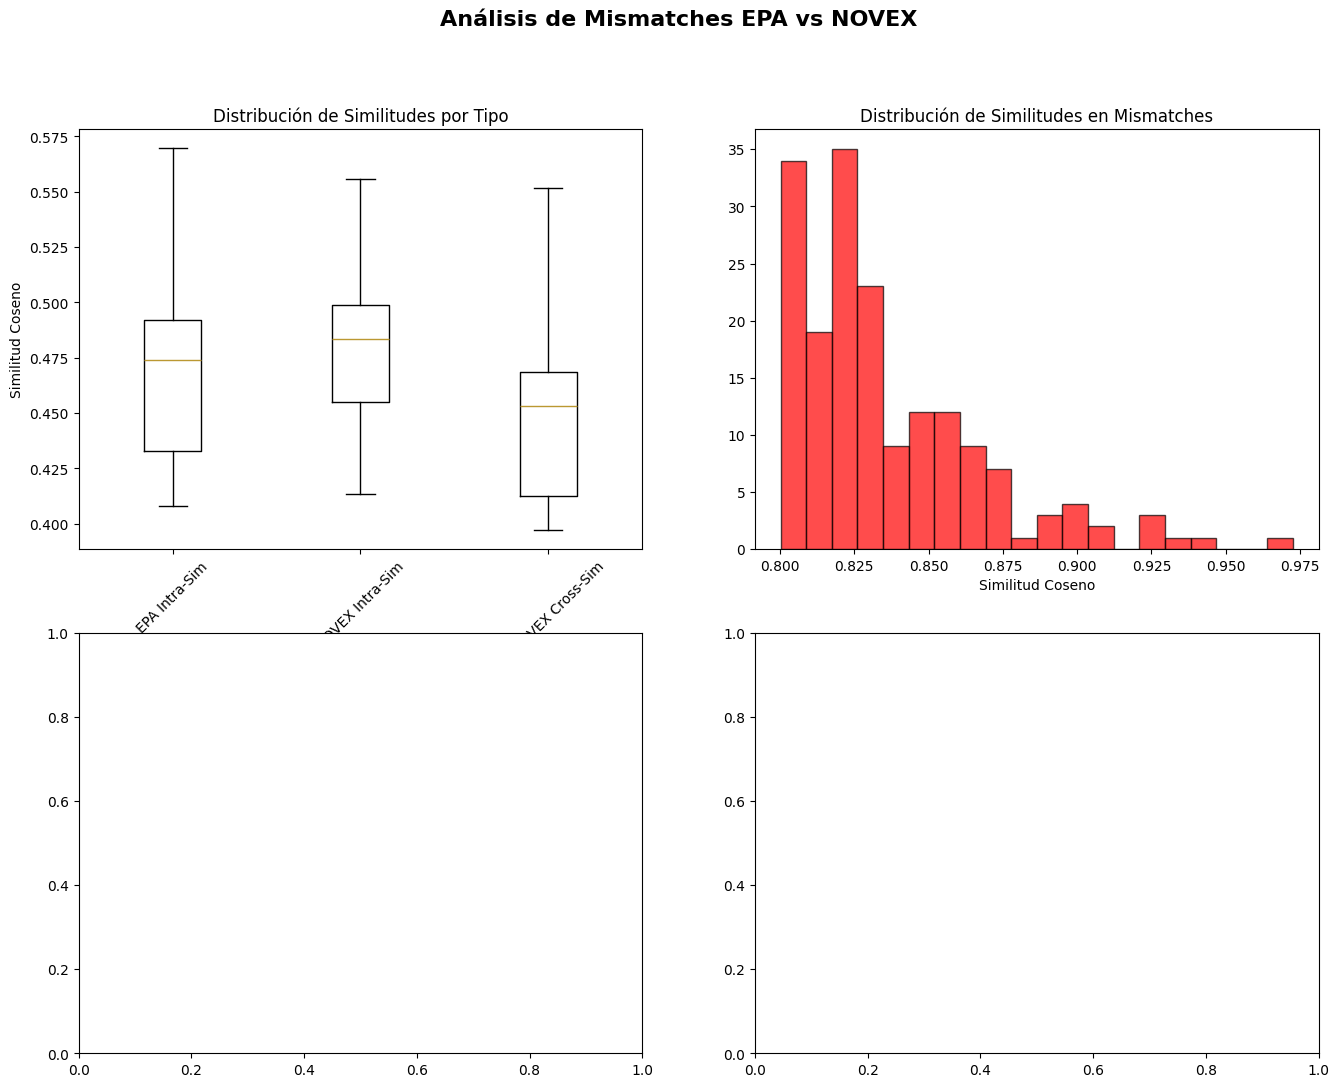

In [52]:
# CELDA 13: VISUALIZACIÓN DE MISMATCHES
# =============================================================================
print("\n" + "="*70)
print("📊 VISUALIZACIONES DE ANÁLISIS DE MISMATCHES")
print("="*70)

# Crear visualizaciones de los resultados
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis de Mismatches EPA vs NOVEX', fontsize=16, fontweight='bold')

# 1. Distribución de similitudes intra-categoría
if similarity_df is not None and len(similarity_df) > 0:
    similarities_data = [
        similarity_df['epa_intra_sim'].values,
        similarity_df['novex_intra_sim'].values,
        similarity_df['cross_sim'].values
    ]
    labels = ['EPA Intra-Sim', 'NOVEX Intra-Sim', 'EPA-NOVEX Cross-Sim']
    axes[0,0].boxplot(similarities_data, labels=labels)
    axes[0,0].set_title('Distribución de Similitudes por Tipo')
    axes[0,0].set_ylabel('Similitud Coseno')
    axes[0,0].tick_params(axis='x', rotation=45)

# 2. Histograma de similitudes en mismatches
if len(semantic_mismatches) > 0:
    axes[0,1].hist(semantic_mismatches['similarity'], bins=20, alpha=0.7, color='red', edgecolor='black')
    axes[0,1].set_title('Distribución de Similitudes en Mismatches')
    axes[0,1].set_xlabel('Similitud Coseno')


In [54]:
# =============================================================================
# CHUNK: CAPTURAR TODOS LOS CASOS DE MISMATCHES (ANÁLISIS COMPLETO)
# =============================================================================
import re
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def find_all_mismatches_comprehensive(embeddings, df_sample, min_similarity=0.60):
    """
    Encuentra TODOS los posibles mismatches con diferentes criterios
    """
    all_mismatches = []

    print(f"🔍 Buscando TODOS los mismatches (similitud > {min_similarity})...")
    print(f"📊 Analizando {len(df_sample):,} productos...")

    # Calcular matriz de similitud completa
    similarity_matrix = cosine_similarity(embeddings)

    # Encontrar todos los pares con similitud por encima del threshold mínimo
    high_similarity_pairs = np.where(
        (similarity_matrix > min_similarity) &
        (similarity_matrix < 0.999)  # Excluir duplicados exactos
    )

    print(f"⏳ Procesando {len(high_similarity_pairs[0]):,} pares candidatos...")

    processed_pairs = set()

    for i, j in zip(high_similarity_pairs[0], high_similarity_pairs[1]):
        if i < j:  # Evitar duplicados
            pair_key = (min(i, j), max(i, j))
            if pair_key not in processed_pairs:
                processed_pairs.add(pair_key)

                prod_i = df_sample.iloc[i]
                prod_j = df_sample.iloc[j]
                similarity_score = similarity_matrix[i, j]

                # Determinar tipo de mismatch
                category_different = prod_i['nombre_categoria'] != prod_j['nombre_categoria']
                family_different = prod_i.get('familia', '') != prod_j.get('familia', '')
                dataset_different = prod_i['source_dataset'] != prod_j['source_dataset']

                # Clasificar el tipo de discrepancia
                mismatch_type = []
                if category_different:
                    mismatch_type.append("categoria")
                if family_different and not category_different:
                    mismatch_type.append("familia")
                if not category_different and not family_different:
                    mismatch_type.append("ninguna")

                mismatch_type_str = "+".join(mismatch_type) if mismatch_type else "ninguna"

                # Incluir TODOS los casos, no solo los que tienen categorías diferentes
                all_mismatches.append({
                    'producto_1': prod_i['descripcion'][:80] + "..." if len(prod_i['descripcion']) > 80 else prod_i['descripcion'],
                    'categoria_1': prod_i['nombre_categoria'],
                    'familia_1': prod_i.get('familia', 'N/A'),
                    'dataset_1': prod_i['source_dataset'],
                    'cod_arancelario_1': prod_i.get('cod_arancelario', 'N/A'),

                    'producto_2': prod_j['descripcion'][:80] + "..." if len(prod_j['descripcion']) > 80 else prod_j['descripcion'],
                    'categoria_2': prod_j['nombre_categoria'],
                    'familia_2': prod_j.get('familia', 'N/A'),
                    'dataset_2': prod_j['source_dataset'],
                    'cod_arancelario_2': prod_j.get('cod_arancelario', 'N/A'),

                    'similarity': similarity_score,
                    'is_cross_dataset': dataset_different,
                    'has_category_mismatch': category_different,
                    'has_family_mismatch': family_different,
                    'mismatch_type': mismatch_type_str,

                    # Índices para referencia
                    'index_1': i,
                    'index_2': j
                })

    print(f"✅ Encontrados {len(all_mismatches):,} casos totales")
    return pd.DataFrame(all_mismatches)

def create_comprehensive_export():
    """
    Crea un export comprehensivo con TODOS los tipos de discrepancias
    """
    print("🚀 INICIANDO ANÁLISIS COMPREHENSIVO DE DISCREPANCIAS")
    print("="*80)

    if 'sample_embeddings_normalized' not in globals() or 'strategic_sample' not in globals():
        print("❌ Variables necesarias no disponibles")
        print("   Ejecuta primero las celdas de embedding generation")
        return None

    # 1. Encontrar todos los mismatches con threshold bajo
    print("📊 PASO 1: Detectando similitudes con threshold 0.60...")
    all_similarity_cases = find_all_mismatches_comprehensive(
        sample_embeddings_normalized,
        strategic_sample,
        min_similarity=0.60
    )

    if len(all_similarity_cases) == 0:
        print("❌ No se encontraron casos de similitud")
        return None

    print(f"✅ Total casos encontrados: {len(all_similarity_cases):,}")

    # 2. Análisis por tipos de discrepancia
    print(f"\n📊 DISTRIBUCIÓN POR TIPO DE DISCREPANCIA:")
    type_counts = all_similarity_cases['mismatch_type'].value_counts()
    for mismatch_type, count in type_counts.items():
        print(f"   • {mismatch_type}: {count:,} casos")

    print(f"\n📊 DISTRIBUCIÓN POR DATASET:")
    dataset_counts = all_similarity_cases['is_cross_dataset'].value_counts()
    print(f"   • Cross-dataset (EPA ↔ NOVEX): {dataset_counts.get(True, 0):,}")
    print(f"   • Intra-dataset (mismo origen): {dataset_counts.get(False, 0):,}")

    # 3. Enriquecer con información adicional
    print(f"\n🔄 PASO 2: Enriqueciendo datos...")
    enriched_data = []

    for idx, row in all_similarity_cases.iterrows():
        # Determinar severidad basada en similitud Y tipo de discrepancia
        if row['similarity'] > 0.90 and row['has_category_mismatch']:
            severidad = "CRÍTICA"
            severidad_num = 5
        elif row['similarity'] > 0.85 and row['has_category_mismatch']:
            severidad = "ALTA"
            severidad_num = 4
        elif row['similarity'] > 0.80 and row['has_category_mismatch']:
            severidad = "MEDIA-ALTA"
            severidad_num = 3
        elif row['similarity'] > 0.75 and (row['has_category_mismatch'] or row['has_family_mismatch']):
            severidad = "MEDIA"
            severidad_num = 2
        else:
            severidad = "BAJA"
            severidad_num = 1

        # Determinar prioridad para revisión
        if row['similarity'] > 0.86 and row['has_category_mismatch'] and row['is_cross_dataset']:
            prioridad = "INMEDIATA"
        elif row['similarity'] > 0.80 and row['has_category_mismatch']:
            prioridad = "ALTA"
        elif row['similarity'] > 0.75 and (row['has_category_mismatch'] or row['has_family_mismatch']):
            prioridad = "MEDIA"
        else:
            prioridad = "BAJA"

        # Calcular métricas adicionales
        palabras_1 = set(str(row['producto_1']).lower().split())
        palabras_2 = set(str(row['producto_2']).lower().split())
        palabras_comunes = len(palabras_1.intersection(palabras_2))
        palabras_totales = len(palabras_1.union(palabras_2))
        jaccard_similarity = palabras_comunes / palabras_totales if palabras_totales > 0 else 0

        enriched_record = {
            # Identificación
            'caso_id': f"CASO_{idx:06d}",
            'fecha_analisis': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),

            # Producto 1
            'prod1_descripcion': row['producto_1'],
            'prod1_categoria': row['categoria_1'],
            'prod1_familia': row['familia_1'],
            'prod1_dataset': row['dataset_1'],
            'prod1_cod_arancelario': row['cod_arancelario_1'],

            # Producto 2
            'prod2_descripcion': row['producto_2'],
            'prod2_categoria': row['categoria_2'],
            'prod2_familia': row['familia_2'],
            'prod2_dataset': row['dataset_2'],
            'prod2_cod_arancelario': row['cod_arancelario_2'],

            # Métricas de similitud
            'similitud_semantica': round(row['similarity'], 4),
            'similitud_percentage': round(row['similarity'] * 100, 2),
            'jaccard_similarity': round(jaccard_similarity, 4),
            'palabras_compartidas': palabras_comunes,
            'palabras_totales_unicas': palabras_totales,

            # Tipos de discrepancia
            'tiene_mismatch_categoria': row['has_category_mismatch'],
            'tiene_mismatch_familia': row['has_family_mismatch'],
            'es_cross_dataset': row['is_cross_dataset'],
            'tipo_discrepancia': row['mismatch_type'],

            # Clasificación de riesgo
            'severidad': severidad,
            'severidad_numerica': severidad_num,
            'prioridad_revision': prioridad,

            # Análisis específico para tu modelo
            'afecta_threshold_86': row['similarity'] > 0.86,
            'conflicto_critico_bert': (row['similarity'] > 0.86 and
                                     row['has_category_mismatch'] and
                                     row['is_cross_dataset']),
            'candidato_bertopic': row['categoria_1'] in only_novex or row['categoria_2'] in only_novex if 'only_novex' in globals() else False,

            # Categorización para análisis
            'rango_similitud': (
                'Muy Alta (>90%)' if row['similarity'] > 0.90 else
                'Alta (85-90%)' if row['similarity'] > 0.85 else
                'Media-Alta (80-85%)' if row['similarity'] > 0.80 else
                'Media (75-80%)' if row['similarity'] > 0.75 else
                'Media-Baja (70-75%)' if row['similarity'] > 0.70 else
                'Baja (60-70%)'
            ),

            'patron_conflicto': f"{row['categoria_1']} ↔ {row['categoria_2']}" if row['has_category_mismatch'] else "Sin conflicto categoría",

            'tipo_dataset': (
                'EPA → NOVEX' if (row['dataset_1'] == 'epa' and row['dataset_2'] == 'novex') else
                'NOVEX → EPA' if (row['dataset_1'] == 'novex' and row['dataset_2'] == 'epa') else
                'EPA → EPA' if (row['dataset_1'] == 'epa' and row['dataset_2'] == 'epa') else
                'NOVEX → NOVEX'
            ),

            # Métricas de texto
            'longitud_desc1': len(str(row['producto_1'])),
            'longitud_desc2': len(str(row['producto_2'])),
            'diferencia_longitud': abs(len(str(row['producto_1'])) - len(str(row['producto_2']))),

            # Flags específicos para análisis
            'requiere_revision_inmediata': prioridad == "INMEDIATA",
            'posible_duplicado': row['similarity'] > 0.95 and not row['has_category_mismatch'],
            'inconsistencia_etiquetado': (row['similarity'] > 0.85 and
                                        row['has_category_mismatch'] and
                                        not row['is_cross_dataset']),
            'conflicto_entre_datasets': (row['similarity'] > 0.80 and
                                       row['has_category_mismatch'] and
                                       row['is_cross_dataset'])
        }

        enriched_data.append(enriched_record)

    return pd.DataFrame(enriched_data)

# EJECUTAR ANÁLISIS COMPREHENSIVO
print("🎯 GENERANDO ANÁLISIS COMPLETO DE TODOS LOS CASOS")
print("="*80)

comprehensive_df = create_comprehensive_export()

if comprehensive_df is not None:
    # Generar archivo CSV
    timestamp = pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')
    filename = f'todos_los_mismatches_completo_{timestamp}.csv'

    # Exportar con todas las opciones para compatibilidad
    comprehensive_df.to_csv(filename, index=False, encoding='utf-8-sig')

    print(f"\n✅ ARCHIVO COMPLETO EXPORTADO: {filename}")
    print(f"📊 Total casos exportados: {len(comprehensive_df):,}")
    print(f"📈 Columnas incluidas: {len(comprehensive_df.columns)}")

    # Estadísticas detalladas del export
    print(f"\n📊 ESTADÍSTICAS COMPLETAS DEL EXPORT:")

    # Por severidad
    print(f"\n🔥 POR SEVERIDAD:")
    sev_counts = comprehensive_df['severidad'].value_counts()
    for sev, count in sev_counts.items():
        pct = count/len(comprehensive_df)*100
        print(f"   • {sev}: {count:,} ({pct:.1f}%)")

    # Por tipo de discrepancia
    print(f"\n🏷️  POR TIPO DE DISCREPANCIA:")
    type_counts = comprehensive_df['tipo_discrepancia'].value_counts()
    for disc_type, count in type_counts.items():
        pct = count/len(comprehensive_df)*100
        print(f"   • {disc_type}: {count:,} ({pct:.1f}%)")

    # Por dataset
    print(f"\n📊 POR ORIGEN DE DATOS:")
    dataset_counts = comprehensive_df['es_cross_dataset'].value_counts()
    cross_count = dataset_counts.get(True, 0)
    intra_count = dataset_counts.get(False, 0)
    print(f"   • Cross-dataset (EPA ↔ NOVEX): {cross_count:,}")
    print(f"   • Intra-dataset (mismo origen): {intra_count:,}")

    # Casos críticos específicos
    critical_bert = comprehensive_df['conflicto_critico_bert'].sum()
    threshold_86 = comprehensive_df['afecta_threshold_86'].sum()
    inmediata = comprehensive_df['requiere_revision_inmediata'].sum()

    print(f"\n⚠️  CASOS CRÍTICOS PARA TU MODELO:")
    print(f"   • Conflictos críticos BERT: {critical_bert:,}")
    print(f"   • Afectan threshold 86%: {threshold_86:,}")
    print(f"   • Requieren revisión inmediata: {inmediata:,}")

    # Top 10 patrones de conflicto
    print(f"\n🔍 TOP 10 PATRONES DE CONFLICTO:")
    conflictos = comprehensive_df[comprehensive_df['tiene_mismatch_categoria']]
    if len(conflictos) > 0:
        top_patterns = conflictos['patron_conflicto'].value_counts().head(10)
        for pattern, count in top_patterns.items():
            print(f"   • {pattern}: {count:,} casos")

    print(f"\n🎯 ARCHIVO LISTO PARA ANÁLISIS COMPLETO:")
    print(f"   📁 {filename}")
    print(f"   📊 Casos totales: {len(comprehensive_df):,}")
    print(f"   🔥 Casos críticos: {critical_bert:,}")
    print(f"   ⚙️  Usa filtros en Power BI para segmentar por severidad y tipo")

    # Crear archivo adicional solo con casos críticos para referencia rápida
    critical_cases = comprehensive_df[
        (comprehensive_df['severidad'].isin(['CRÍTICA', 'ALTA'])) |
        (comprehensive_df['conflicto_critico_bert'] == True)
    ]

    if len(critical_cases) > 0:
        critical_filename = f'casos_criticos_prioritarios_{timestamp}.csv'
        critical_cases.to_csv(critical_filename, index=False, encoding='utf-8-sig')
        print(f"\n🔥 BONUS: Archivo de casos críticos: {critical_filename}")
        print(f"   📊 Casos prioritarios: {len(critical_cases):,}")

else:
    print("❌ No se pudo generar el análisis comprehensivo")
    print("   Verifica que las variables necesarias estén disponibles")

print(f"\n💡 AHORA TIENES TODOS LOS CASOS PARA TU ANÁLISIS ADICIONAL!")

🎯 GENERANDO ANÁLISIS COMPLETO DE TODOS LOS CASOS
🚀 INICIANDO ANÁLISIS COMPREHENSIVO DE DISCREPANCIAS
📊 PASO 1: Detectando similitudes con threshold 0.60...
🔍 Buscando TODOS los mismatches (similitud > 0.6)...
📊 Analizando 5,789 productos...
⏳ Procesando 262,166 pares candidatos...
✅ Encontrados 131,083 casos totales
✅ Total casos encontrados: 131,083

📊 DISTRIBUCIÓN POR TIPO DE DISCREPANCIA:
   • ninguna: 50,627 casos
   • familia: 45,901 casos
   • categoria: 34,555 casos

📊 DISTRIBUCIÓN POR DATASET:
   • Cross-dataset (EPA ↔ NOVEX): 40,628
   • Intra-dataset (mismo origen): 90,455

🔄 PASO 2: Enriqueciendo datos...

✅ ARCHIVO COMPLETO EXPORTADO: todos_los_mismatches_completo_20250815_194238.csv
📊 Total casos exportados: 131,083
📈 Columnas incluidas: 37

📊 ESTADÍSTICAS COMPLETAS DEL EXPORT:

🔥 POR SEVERIDAD:
   • BAJA: 126,773 (96.7%)
   • MEDIA: 4,134 (3.2%)
   • MEDIA-ALTA: 127 (0.1%)
   • ALTA: 39 (0.0%)
   • CRÍTICA: 10 (0.0%)

🏷️  POR TIPO DE DISCREPANCIA:
   • ninguna: 50,627 (38

In [ ]:
# =============================================================================
# CHUNK: EXPORTAR MISMATCHES CRÍTICOS A CSV PARA POWER BI
# =============================================================================
import re
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_novex_in_exclusive_categories(embeddings, df_sample, epa_descriptions, only_novex_categories, similarity_threshold=0.80):
    """
    Encuentra productos en NOVEX (en categorías exclusivas) que son semánticamente similares a productos en EPA.
    """
    similar_products = []

    print(f"🔍 Buscando productos en NOVEX (categorías exclusivas) similares a EPA (similitud > {similarity_threshold})...")

    # Filtrar productos de EPA y NOVEX (solo categorías exclusivas de NOVEX)
    epa_sample = df_sample[df_sample['source_dataset'] == 'epa'].copy()
    novex_exclusive_sample = df_sample[
        (df_sample['source_dataset'] == 'novex_exclusive') &
        (df_sample['nombre_categoria'].isin(only_novex_categories))
    ].copy()

    if len(epa_sample) == 0 or len(novex_exclusive_sample) == 0:
        print("❌ No hay suficientes productos en EPA o en categorías exclusivas de NOVEX para comparar.")
        return pd.DataFrame()

    # Obtener embeddings para estos sub-datasets
    epa_indices = epa_sample.index.tolist()
    novex_exclusive_indices = novex_exclusive_sample.index.tolist()

    epa_embeddings = embeddings[epa_indices]
    novex_exclusive_embeddings = embeddings[novex_exclusive_indices]

    # Calcular similitud cruzada entre EPA y NOVEX (categorías exclusivas)
    cross_similarity_matrix = cosine_similarity(epa_embeddings, novex_exclusive_embeddings)

    print(f"📊 Matriz de similitud cruzada calculada: {cross_similarity_matrix.shape}")

    # Encontrar pares con alta similitud
    high_similarity_pairs = np.where(cross_similarity_matrix > similarity_threshold)

    print(f"⏳ Procesando {len(high_similarity_pairs[0]):,} pares candidatos con alta similitud...")

    for i, j in zip(high_similarity_pairs[0], high_similarity_pairs[1]):
        epa_prod = epa_sample.iloc[i]
        novex_prod = novex_exclusive_sample.iloc[j]
        similarity_score = cross_similarity_matrix[i, j]

        similar_products.append({
            'similitud': round(similarity_score, 4),
            'producto_epa': epa_prod['descripcion'][:80] + "..." if len(epa_prod['descripcion']) > 80 else epa_prod['descripcion'],
            'categoria_epa': epa_prod['nombre_categoria'],
            'familia_epa': epa_prod.get('familia', 'N/A'),
            'producto_novex': novex_prod['descripcion'][:80] + "..." if len(novex_prod['descripcion']) > 80 else novex_prod['descripcion'],
            'categoria_novex': novex_prod['nombre_categoria'],
            'familia_novex': novex_prod.get('familia', 'N/A'),
            'cod_arancelario_novex': novex_prod.get('cod_arancelario', 'N/A'), # Added arancel code
            'subfamilia_novex': novex_prod.get('subfamilia', 'N/A') # Added subfamilia
        })

    return pd.DataFrame(similar_products)

# --- Ejecutar el análisis específico ---
print("\n" + "="*70)
print("🔍 ENCONTRANDO SIMILITUD EPA ↔ NOVEX (Categorías Exclusivas)")
print("="*70)

if 'sample_embeddings_normalized' in globals() and 'strategic_sample' in globals() and 'only_novex' in globals():
    similar_exclusive_products = find_similar_novex_in_exclusive_categories(
        sample_embeddings_normalized,
        strategic_sample,
        set(df_train['descripcion'].dropna().str.strip().str.lower()), # Pass all EPA descriptions for context
        only_novex,
        similarity_threshold=0.80 # Can adjust this threshold
    )

    print(f"\n✅ Productos similares encontrados en categorías exclusivas de NOVEX: {len(similar_exclusive_products):,}")

    if len(similar_exclusive_products) > 0:
        # Ordenar por similitud para ver los casos más cercanos primero
        similar_exclusive_products_sorted = similar_exclusive_products.sort_values('similitud', ascending=False)

        print("\n🔥 TOP 10 PRODUCTOS NOVEX (Categorías Exclusivas) SIMILARES A EPA:")
        print("-" * 120)

        for idx, row in similar_exclusive_products_sorted.head(10).iterrows():
            print(f"📊 Similitud: {row['similitud']:.3f}")
            print(f"📝 Producto EPA: {row['producto_epa']}")
            print(f"🏷️  Categoría EPA: {row['categoria_epa']} | Familia EPA: {row['familia_epa']}")
            print(f"📝 Producto NOVEX: {row['producto_novex']}")
            print(f"🏷️  Categoría NOVEX (Exclusiva): {row['categoria_novex']} | Familia NOVEX: {row['familia_novex']} | Subfamilia NOVEX: {row['subfamilia_novex']}")
            print(f"📦 Código Arancelario NOVEX: {row['cod_arancelario_novex']}")
            print("-" * 60)

        # Opcional: Exportar estos resultados a un CSV
        # timestamp = pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')
        # filename = f'novex_exclusive_similarities_{timestamp}.csv'
        # similar_exclusive_products_sorted.to_csv(filename, index=False, encoding='utf-8-sig')
        # print(f"\n✅ Resultados exportados a: {filename}")

    else:
        print("❌ No se encontraron productos en categorías exclusivas de NOVEX con alta similitud (> 0.80) a productos de EPA en la muestra estratégica.")

else:
    print("\n⚠️  Variables necesarias para el análisis no disponibles.")
    print("    Asegúrate de haber ejecutado las celdas anteriores para generar embeddings y variables de categorías.")


🔍 ENCONTRANDO SIMILITUD EPA ↔ NOVEX (Categorías Exclusivas)
🔍 Buscando productos en NOVEX (categorías exclusivas) similares a EPA (similitud > 0.8)...
📊 Matriz de similitud cruzada calculada: (2427, 542)
⏳ Procesando 5 pares candidatos con alta similitud...

✅ Productos similares encontrados en categorías exclusivas de NOVEX: 5

🔥 TOP 10 PRODUCTOS NOVEX (Categorías Exclusivas) SIMILARES A EPA:
------------------------------------------------------------------------------------------------------------------------
📊 Similitud: 0.831
📝 Producto EPA: ASPIRADORA 20L INALAMBRICA 18V PXC HUMEDO/SECO
🏷️  Categoría EPA: MAQUINARIA | Familia EPA: HERRAMIENTAS INALAMBRICAS
📝 Producto NOVEX: ASPIRADORA INALAMBRICA 20V 2.0 AH GALAXIA 94301
🏷️  Categoría NOVEX (Exclusiva): ELECTRODOMÉSTICOS | Familia NOVEX: ASPIRADORAS | Subfamilia NOVEX: N/A
📦 Código Arancelario NOVEX: 85081110
------------------------------------------------------------
📊 Similitud: 0.828
📝 Producto EPA: ASPIRADORA 20L INALAMBRIC

In [ ]:
# Display categories exclusive to each dataset
print("Categories only in NOVEX:")
if 'only_novex' in globals():
    for cat in only_novex:
        print(f"- {cat}")
else:
    print("Variable 'only_novex' not found. Please run the category analysis cell.")

print("\nCategories only in EPA:")
if 'only_epa' in globals():
    for cat in only_epa:
        print(f"- {cat}")
else:
    print("Variable 'only_epa' not found. Please run the category analysis cell.")

Categories only in NOVEX:
- CERRAJERIA
- ELECTRODOMÉSTICOS
- PINTURA
- PUERTAS Y VENTANAS

Categories only in EPA:
- PUERTA Y VENTANAS
- ELECTRODOMÉSTICOSS
- IMPULSO
- PINTURAS
- CENTRO MUEBLERO
- CERRAJERÍA
